In [66]:
import pandas as pd

import numpy as np

import seaborn as sns

In [67]:
path = 'sentiment_tweets3.csv'

In [68]:
df = pd.read_csv(path)

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10314 entries, 0 to 10313
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Index                      10314 non-null  int64 
 1   message to examine         10314 non-null  object
 2   label (depression result)  10314 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 241.9+ KB


In [70]:
df.describe()

,Index,label (depression result)
count,10314.000000,10314.000000
mean,491253.470525,0.224355
std,261688.134407,0.417177
min,106.000000,0.000000
25%,263019.250000,0.000000
50%,514988.000000,0.000000
75%,773521.500000,0.000000
max,802313.000000,1.000000


In [71]:
df.head()

,Index,message to examine,label (depression result)
0,106,just had a real good moment. i missssssssss hi...,0
1,217,is reading manga http://plurk.com/p/mzp1e,0
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,288,@lapcat Need to send 'em to my accountant tomo...,0
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0


In [72]:
df['label (depression result)'].value_counts()

0    8000
1    2314
Name: label (depression result), dtype: int64

In [73]:
df.tail()

,Index,message to examine,label (depression result)
10309,802309,No Depression by G Herbo is my mood from now o...,1
10310,802310,What do you do when depression succumbs the br...,1
10311,802311,Ketamine Nasal Spray Shows Promise Against Dep...,1
10312,802312,dont mistake a bad day with depression! everyo...,1
10313,802313,0,1


In [74]:
df['label (depression result)'].count()

10314

In [75]:
df.loc[10311]['message to examine']

'Ketamine Nasal Spray Shows Promise Against Depression, Suicide #health https://cmun.it/4sjligkÂ\xa0'

In [76]:
df.loc[3]['message to examine']

"@lapcat Need to send 'em to my accountant tomorrow. Oddly, I wasn't even referring to my taxes. Those are supporting evidence, though. "

In [77]:
df.loc[1234]['message to examine']

'@dsthestar1121 Last night was FUN!!! Well this morning.  lol.  See ya Saturday- get ready to REALLY party!  '

In [78]:
#checking for any null value

df.isnull().sum()

Index                        0
message to examine           0
label (depression result)    0
dtype: int64

In [79]:
#for checking is there is any number 

for i in df['message to examine']:
    for j in i.split():
        if j.isdigit():
            s= "yes"
        else:
            s= "no"
print(s)    

yes


In [80]:
#REMOVE NUMBER

import re

#first remove all the numbers 

def remove_numbers(text):
    return ' '.join([i for i in str(text).split() if not i.isdigit()])

df['clean_tweets'] = df['message to examine'].apply(lambda x:remove_numbers(x))

In [81]:
df

,Index,message to examine,label (depression result),clean_tweets
0,106,just had a real good moment. i missssssssss hi...,0,just had a real good moment. i missssssssss hi...
1,217,is reading manga http://plurk.com/p/mzp1e,0,is reading manga http://plurk.com/p/mzp1e
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0,@comeagainjen http://twitpic.com/2y2lx - http:...
3,288,@lapcat Need to send 'em to my accountant tomo...,0,@lapcat Need to send 'em to my accountant tomo...
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0,ADD ME ON MYSPACE!!! myspace.com/LookThunder
...,...,...,...,...
10309,802309,No Depression by G Herbo is my mood from now o...,1,No Depression by G Herbo is my mood from now o...
10310,802310,What do you do when depression succumbs the br...,1,What do you do when depression succumbs the br...
10311,802311,Ketamine Nasal Spray Shows Promise Against Dep...,1,Ketamine Nasal Spray Shows Promise Against Dep...
10312,802312,dont mistake a bad day with depression! everyo...,1,dont mistake a bad day with depression! everyo...


In [82]:
#lowercasing all the tweets

df['clean_tweets'] = df['clean_tweets'].str.lower()

df


,Index,message to examine,label (depression result),clean_tweets
0,106,just had a real good moment. i missssssssss hi...,0,just had a real good moment. i missssssssss hi...
1,217,is reading manga http://plurk.com/p/mzp1e,0,is reading manga http://plurk.com/p/mzp1e
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0,@comeagainjen http://twitpic.com/2y2lx - http:...
3,288,@lapcat Need to send 'em to my accountant tomo...,0,@lapcat need to send 'em to my accountant tomo...
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0,add me on myspace!!! myspace.com/lookthunder
...,...,...,...,...
10309,802309,No Depression by G Herbo is my mood from now o...,1,no depression by g herbo is my mood from now o...
10310,802310,What do you do when depression succumbs the br...,1,what do you do when depression succumbs the br...
10311,802311,Ketamine Nasal Spray Shows Promise Against Dep...,1,ketamine nasal spray shows promise against dep...
10312,802312,dont mistake a bad day with depression! everyo...,1,dont mistake a bad day with depression! everyo...


In [83]:
#remove web links

def remove_weblinks(text):
    return re.sub(r"http\S+", "",text)

df['clean_tweets2'] = df['clean_tweets'].apply(lambda x: remove_weblinks(x))
df

,Index,message to examine,label (depression result),clean_tweets,clean_tweets2
0,106,just had a real good moment. i missssssssss hi...,0,just had a real good moment. i missssssssss hi...,just had a real good moment. i missssssssss hi...
1,217,is reading manga http://plurk.com/p/mzp1e,0,is reading manga http://plurk.com/p/mzp1e,is reading manga
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0,@comeagainjen http://twitpic.com/2y2lx - http:...,@comeagainjen -
3,288,@lapcat Need to send 'em to my accountant tomo...,0,@lapcat need to send 'em to my accountant tomo...,@lapcat need to send 'em to my accountant tomo...
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0,add me on myspace!!! myspace.com/lookthunder,add me on myspace!!! myspace.com/lookthunder
...,...,...,...,...,...
10309,802309,No Depression by G Herbo is my mood from now o...,1,no depression by g herbo is my mood from now o...,no depression by g herbo is my mood from now o...
10310,802310,What do you do when depression succumbs the br...,1,what do you do when depression succumbs the br...,what do you do when depression succumbs the br...
10311,802311,Ketamine Nasal Spray Shows Promise Against Dep...,1,ketamine nasal spray shows promise against dep...,ketamine nasal spray shows promise against dep...
10312,802312,dont mistake a bad day with depression! everyo...,1,dont mistake a bad day with depression! everyo...,dont mistake a bad day with depression! everyo...


In [84]:
#remove twitter mentions

def remove_twitter(text):
    return re.sub('@[\w]+','',text)

df['clean_tweets3'] = df['clean_tweets2'].apply(lambda x: remove_twitter(x))
df

,Index,message to examine,label (depression result),clean_tweets,clean_tweets2,clean_tweets3
0,106,just had a real good moment. i missssssssss hi...,0,just had a real good moment. i missssssssss hi...,just had a real good moment. i missssssssss hi...,just had a real good moment. i missssssssss hi...
1,217,is reading manga http://plurk.com/p/mzp1e,0,is reading manga http://plurk.com/p/mzp1e,is reading manga,is reading manga
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0,@comeagainjen http://twitpic.com/2y2lx - http:...,@comeagainjen -,-
3,288,@lapcat Need to send 'em to my accountant tomo...,0,@lapcat need to send 'em to my accountant tomo...,@lapcat need to send 'em to my accountant tomo...,need to send 'em to my accountant tomorrow. o...
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0,add me on myspace!!! myspace.com/lookthunder,add me on myspace!!! myspace.com/lookthunder,add me on myspace!!! myspace.com/lookthunder
...,...,...,...,...,...,...
10309,802309,No Depression by G Herbo is my mood from now o...,1,no depression by g herbo is my mood from now o...,no depression by g herbo is my mood from now o...,no depression by g herbo is my mood from now o...
10310,802310,What do you do when depression succumbs the br...,1,what do you do when depression succumbs the br...,what do you do when depression succumbs the br...,what do you do when depression succumbs the br...
10311,802311,Ketamine Nasal Spray Shows Promise Against Dep...,1,ketamine nasal spray shows promise against dep...,ketamine nasal spray shows promise against dep...,ketamine nasal spray shows promise against dep...
10312,802312,dont mistake a bad day with depression! everyo...,1,dont mistake a bad day with depression! everyo...,dont mistake a bad day with depression! everyo...,dont mistake a bad day with depression! everyo...


In [85]:
#remove punctuations

import string

PUNCT_TO_REMOVE =string.punctuation

def remove_punctuations(text):
    return text.translate(str.maketrans('','',PUNCT_TO_REMOVE))

df['clean_tweets4'] = df['clean_tweets3'].apply(lambda x: remove_punctuations(x))
df

,Index,message to examine,label (depression result),clean_tweets,clean_tweets2,clean_tweets3,clean_tweets4
0,106,just had a real good moment. i missssssssss hi...,0,just had a real good moment. i missssssssss hi...,just had a real good moment. i missssssssss hi...,just had a real good moment. i missssssssss hi...,just had a real good moment i missssssssss him...
1,217,is reading manga http://plurk.com/p/mzp1e,0,is reading manga http://plurk.com/p/mzp1e,is reading manga,is reading manga,is reading manga
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0,@comeagainjen http://twitpic.com/2y2lx - http:...,@comeagainjen -,-,
3,288,@lapcat Need to send 'em to my accountant tomo...,0,@lapcat need to send 'em to my accountant tomo...,@lapcat need to send 'em to my accountant tomo...,need to send 'em to my accountant tomorrow. o...,need to send em to my accountant tomorrow odd...
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0,add me on myspace!!! myspace.com/lookthunder,add me on myspace!!! myspace.com/lookthunder,add me on myspace!!! myspace.com/lookthunder,add me on myspace myspacecomlookthunder
...,...,...,...,...,...,...,...
10309,802309,No Depression by G Herbo is my mood from now o...,1,no depression by g herbo is my mood from now o...,no depression by g herbo is my mood from now o...,no depression by g herbo is my mood from now o...,no depression by g herbo is my mood from now o...
10310,802310,What do you do when depression succumbs the br...,1,what do you do when depression succumbs the br...,what do you do when depression succumbs the br...,what do you do when depression succumbs the br...,what do you do when depression succumbs the br...
10311,802311,Ketamine Nasal Spray Shows Promise Against Dep...,1,ketamine nasal spray shows promise against dep...,ketamine nasal spray shows promise against dep...,ketamine nasal spray shows promise against dep...,ketamine nasal spray shows promise against dep...
10312,802312,dont mistake a bad day with depression! everyo...,1,dont mistake a bad day with depression! everyo...,dont mistake a bad day with depression! everyo...,dont mistake a bad day with depression! everyo...,dont mistake a bad day with depression everyon...


In [86]:
#REMOVAL OF STOPWORDS

import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sneha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [87]:
from nltk.corpus import stopwords
",".join(stopwords.words('english'))

"i,me,my,myself,we,our,ours,ourselves,you,you're,you've,you'll,you'd,your,yours,yourself,yourselves,he,him,his,himself,she,she's,her,hers,herself,it,it's,its,itself,they,them,their,theirs,themselves,what,which,who,whom,this,that,that'll,these,those,am,is,are,was,were,be,been,being,have,has,had,having,do,does,did,doing,a,an,the,and,but,if,or,because,as,until,while,of,at,by,for,with,about,against,between,into,through,during,before,after,above,below,to,from,up,down,in,out,on,off,over,under,again,further,then,once,here,there,when,where,why,how,all,any,both,each,few,more,most,other,some,such,no,nor,not,only,own,same,so,than,too,very,s,t,can,will,just,don,don't,should,should've,now,d,ll,m,o,re,ve,y,ain,aren,aren't,couldn,couldn't,didn,didn't,doesn,doesn't,hadn,hadn't,hasn,hasn't,haven,haven't,isn,isn't,ma,mightn,mightn't,mustn,mustn't,needn,needn't,shan,shan't,shouldn,shouldn't,wasn,wasn't,weren,weren't,won,won't,wouldn,wouldn't"

In [88]:
STOPWORDS = set(stopwords.words('english'))

def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

df['clean_tweets5'] = df['clean_tweets4'].apply(lambda x: remove_stopwords(x))
df

,Index,message to examine,label (depression result),clean_tweets,clean_tweets2,clean_tweets3,clean_tweets4,clean_tweets5
0,106,just had a real good moment. i missssssssss hi...,0,just had a real good moment. i missssssssss hi...,just had a real good moment. i missssssssss hi...,just had a real good moment. i missssssssss hi...,just had a real good moment i missssssssss him...,real good moment missssssssss much
1,217,is reading manga http://plurk.com/p/mzp1e,0,is reading manga http://plurk.com/p/mzp1e,is reading manga,is reading manga,is reading manga,reading manga
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0,@comeagainjen http://twitpic.com/2y2lx - http:...,@comeagainjen -,-,,
3,288,@lapcat Need to send 'em to my accountant tomo...,0,@lapcat need to send 'em to my accountant tomo...,@lapcat need to send 'em to my accountant tomo...,need to send 'em to my accountant tomorrow. o...,need to send em to my accountant tomorrow odd...,need send em accountant tomorrow oddly wasnt e...
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0,add me on myspace!!! myspace.com/lookthunder,add me on myspace!!! myspace.com/lookthunder,add me on myspace!!! myspace.com/lookthunder,add me on myspace myspacecomlookthunder,add myspace myspacecomlookthunder
...,...,...,...,...,...,...,...,...
10309,802309,No Depression by G Herbo is my mood from now o...,1,no depression by g herbo is my mood from now o...,no depression by g herbo is my mood from now o...,no depression by g herbo is my mood from now o...,no depression by g herbo is my mood from now o...,depression g herbo mood im done stressing peop...
10310,802310,What do you do when depression succumbs the br...,1,what do you do when depression succumbs the br...,what do you do when depression succumbs the br...,what do you do when depression succumbs the br...,what do you do when depression succumbs the br...,depression succumbs brain makes feel like youl...
10311,802311,Ketamine Nasal Spray Shows Promise Against Dep...,1,ketamine nasal spray shows promise against dep...,ketamine nasal spray shows promise against dep...,ketamine nasal spray shows promise against dep...,ketamine nasal spray shows promise against dep...,ketamine nasal spray shows promise depression ...
10312,802312,dont mistake a bad day with depression! everyo...,1,dont mistake a bad day with depression! everyo...,dont mistake a bad day with depression! everyo...,dont mistake a bad day with depression! everyo...,dont mistake a bad day with depression everyon...,dont mistake bad day depression everyone em


In [89]:
#FREEQUENT WORDS

from collections import Counter
cnt = Counter()

for text in df['clean_tweets5'].values:
    for word in text.split():
        cnt[word] +=1
        
cnt.most_common(10)
    

[('depression', 2285),
 ('im', 1039),
 ('good', 686),
 ('day', 558),
 ('like', 553),
 ('love', 551),
 ('get', 484),
 ('dont', 408),
 ('lol', 404),
 ('know', 403)]

In [90]:
#rare words

n_rare_words = 10
RAREWORDS = set([w for (w,wc) in cnt.most_common()[:-n_rare_words-1:-1]])

RAREWORDS

{'bharatu',
 'dolls',
 'gteens',
 'herbo',
 'nagging',
 'persistent',
 'pictwittercomhmcwffkyu7',
 'pictwittercomqggbqpzumr',
 'provoking',
 'succumbs'}

In [91]:
#lets remove the rare words

def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in RAREWORDS])

df['clean_tweets6'] = df['clean_tweets5'].apply(lambda x: remove_stopwords(x))

df

,Index,message to examine,label (depression result),clean_tweets,clean_tweets2,clean_tweets3,clean_tweets4,clean_tweets5,clean_tweets6
0,106,just had a real good moment. i missssssssss hi...,0,just had a real good moment. i missssssssss hi...,just had a real good moment. i missssssssss hi...,just had a real good moment. i missssssssss hi...,just had a real good moment i missssssssss him...,real good moment missssssssss much,real good moment missssssssss much
1,217,is reading manga http://plurk.com/p/mzp1e,0,is reading manga http://plurk.com/p/mzp1e,is reading manga,is reading manga,is reading manga,reading manga,reading manga
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0,@comeagainjen http://twitpic.com/2y2lx - http:...,@comeagainjen -,-,,,
3,288,@lapcat Need to send 'em to my accountant tomo...,0,@lapcat need to send 'em to my accountant tomo...,@lapcat need to send 'em to my accountant tomo...,need to send 'em to my accountant tomorrow. o...,need to send em to my accountant tomorrow odd...,need send em accountant tomorrow oddly wasnt e...,need send em accountant tomorrow oddly wasnt e...
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0,add me on myspace!!! myspace.com/lookthunder,add me on myspace!!! myspace.com/lookthunder,add me on myspace!!! myspace.com/lookthunder,add me on myspace myspacecomlookthunder,add myspace myspacecomlookthunder,add myspace myspacecomlookthunder
...,...,...,...,...,...,...,...,...,...
10309,802309,No Depression by G Herbo is my mood from now o...,1,no depression by g herbo is my mood from now o...,no depression by g herbo is my mood from now o...,no depression by g herbo is my mood from now o...,no depression by g herbo is my mood from now o...,depression g herbo mood im done stressing peop...,depression g mood im done stressing people don...
10310,802310,What do you do when depression succumbs the br...,1,what do you do when depression succumbs the br...,what do you do when depression succumbs the br...,what do you do when depression succumbs the br...,what do you do when depression succumbs the br...,depression succumbs brain makes feel like youl...,depression brain makes feel like youll never e...
10311,802311,Ketamine Nasal Spray Shows Promise Against Dep...,1,ketamine nasal spray shows promise against dep...,ketamine nasal spray shows promise against dep...,ketamine nasal spray shows promise against dep...,ketamine nasal spray shows promise against dep...,ketamine nasal spray shows promise depression ...,ketamine nasal spray shows promise depression ...
10312,802312,dont mistake a bad day with depression! everyo...,1,dont mistake a bad day with depression! everyo...,dont mistake a bad day with depression! everyo...,dont mistake a bad day with depression! everyo...,dont mistake a bad day with depression everyon...,dont mistake bad day depression everyone em,dont mistake bad day depression everyone em


In [92]:
#LEMMATIZATION

nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sneha\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\sneha\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [93]:
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

wordnet_map = {"n": wordnet.NOUN , "v": wordnet.VERB , "j": wordnet.ADJ , "r": wordnet.ADV}

def lemmatize_words(text):
    pos_tagged_text = nltk.pos_tag(text.split())
    return " ".join([lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.VERB)) for word, pos in pos_tagged_text])

df["text_lemmatized"] = df['clean_tweets6'].apply(lambda text: lemmatize_words(text))


In [94]:
df

,Index,message to examine,label (depression result),clean_tweets,clean_tweets2,clean_tweets3,clean_tweets4,clean_tweets5,clean_tweets6,text_lemmatized
0,106,just had a real good moment. i missssssssss hi...,0,just had a real good moment. i missssssssss hi...,just had a real good moment. i missssssssss hi...,just had a real good moment. i missssssssss hi...,just had a real good moment i missssssssss him...,real good moment missssssssss much,real good moment missssssssss much,real good moment miss much
1,217,is reading manga http://plurk.com/p/mzp1e,0,is reading manga http://plurk.com/p/mzp1e,is reading manga,is reading manga,is reading manga,reading manga,reading manga,read manga
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0,@comeagainjen http://twitpic.com/2y2lx - http:...,@comeagainjen -,-,,,,
3,288,@lapcat Need to send 'em to my accountant tomo...,0,@lapcat need to send 'em to my accountant tomo...,@lapcat need to send 'em to my accountant tomo...,need to send 'em to my accountant tomorrow. o...,need to send em to my accountant tomorrow odd...,need send em accountant tomorrow oddly wasnt e...,need send em accountant tomorrow oddly wasnt e...,need send em accountant tomorrow oddly wasnt e...
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0,add me on myspace!!! myspace.com/lookthunder,add me on myspace!!! myspace.com/lookthunder,add me on myspace!!! myspace.com/lookthunder,add me on myspace myspacecomlookthunder,add myspace myspacecomlookthunder,add myspace myspacecomlookthunder,add myspace myspacecomlookthunder
...,...,...,...,...,...,...,...,...,...,...
10309,802309,No Depression by G Herbo is my mood from now o...,1,no depression by g herbo is my mood from now o...,no depression by g herbo is my mood from now o...,no depression by g herbo is my mood from now o...,no depression by g herbo is my mood from now o...,depression g herbo mood im done stressing peop...,depression g mood im done stressing people don...,depression g mood im do stress people dont des...
10310,802310,What do you do when depression succumbs the br...,1,what do you do when depression succumbs the br...,what do you do when depression succumbs the br...,what do you do when depression succumbs the br...,what do you do when depression succumbs the br...,depression succumbs brain makes feel like youl...,depression brain makes feel like youll never e...,depression brain make feel like youll never en...
10311,802311,Ketamine Nasal Spray Shows Promise Against Dep...,1,ketamine nasal spray shows promise against dep...,ketamine nasal spray shows promise against dep...,ketamine nasal spray shows promise against dep...,ketamine nasal spray shows promise against dep...,ketamine nasal spray shows promise depression ...,ketamine nasal spray shows promise depression ...,ketamine nasal spray show promise depression s...
10312,802312,dont mistake a bad day with depression! everyo...,1,dont mistake a bad day with depression! everyo...,dont mistake a bad day with depression! everyo...,dont mistake a bad day with depression! everyo...,dont mistake a bad day with depression everyon...,dont mistake bad day depression everyone em,dont mistake bad day depression everyone em,dont mistake bad day depression everyone em


In [95]:
#replace some short words

short_words = {
"aint": "am not",
"arent": "are not",
"cant": "cannot",
"'cause": "because",
"couldve": "could have",
"couldnt": "could not",
"didnt": "did not",
"doesnt": "does not",
"dont": "do not",
"hadnt": "had not",
"hasnt": "has not",
"havent": "have not",
"im": "I am",
"em": "them",
"ive": "I have",
"isnt": "is not",
"lets": "let us",
"theyre": "they are",
"theyve": "they have",
"wasnt": "was not",
"well": "we will",
"were": "we are",
"werent": "were not",
"you're": "you are",
"you've": "you have"
}


In [96]:
def replace_short_words(text):
    for word in text.split():
        if word in short_words:
            text = text.replace(word , short_words[word])
    return text

df['clean_tweets7'] = df['text_lemmatized'].apply(lambda text: replace_short_words(text))

df

,Index,message to examine,label (depression result),clean_tweets,clean_tweets2,clean_tweets3,clean_tweets4,clean_tweets5,clean_tweets6,text_lemmatized,clean_tweets7
0,106,just had a real good moment. i missssssssss hi...,0,just had a real good moment. i missssssssss hi...,just had a real good moment. i missssssssss hi...,just had a real good moment. i missssssssss hi...,just had a real good moment i missssssssss him...,real good moment missssssssss much,real good moment missssssssss much,real good moment miss much,real good moment miss much
1,217,is reading manga http://plurk.com/p/mzp1e,0,is reading manga http://plurk.com/p/mzp1e,is reading manga,is reading manga,is reading manga,reading manga,reading manga,read manga,read manga
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0,@comeagainjen http://twitpic.com/2y2lx - http:...,@comeagainjen -,-,,,,,
3,288,@lapcat Need to send 'em to my accountant tomo...,0,@lapcat need to send 'em to my accountant tomo...,@lapcat need to send 'em to my accountant tomo...,need to send 'em to my accountant tomorrow. o...,need to send em to my accountant tomorrow odd...,need send em accountant tomorrow oddly wasnt e...,need send em accountant tomorrow oddly wasnt e...,need send em accountant tomorrow oddly wasnt e...,need send them accountant tomorrow oddly was n...
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0,add me on myspace!!! myspace.com/lookthunder,add me on myspace!!! myspace.com/lookthunder,add me on myspace!!! myspace.com/lookthunder,add me on myspace myspacecomlookthunder,add myspace myspacecomlookthunder,add myspace myspacecomlookthunder,add myspace myspacecomlookthunder,add myspace myspacecomlookthunder
...,...,...,...,...,...,...,...,...,...,...,...
10309,802309,No Depression by G Herbo is my mood from now o...,1,no depression by g herbo is my mood from now o...,no depression by g herbo is my mood from now o...,no depression by g herbo is my mood from now o...,no depression by g herbo is my mood from now o...,depression g herbo mood im done stressing peop...,depression g mood im done stressing people don...,depression g mood im do stress people dont des...,depression g mood I am do stress people do not...
10310,802310,What do you do when depression succumbs the br...,1,what do you do when depression succumbs the br...,what do you do when depression succumbs the br...,what do you do when depression succumbs the br...,what do you do when depression succumbs the br...,depression succumbs brain makes feel like youl...,depression brain makes feel like youll never e...,depression brain make feel like youll never en...,depression brain make feel like youll never en...
10311,802311,Ketamine Nasal Spray Shows Promise Against Dep...,1,ketamine nasal spray shows promise against dep...,ketamine nasal spray shows promise against dep...,ketamine nasal spray shows promise against dep...,ketamine nasal spray shows promise against dep...,ketamine nasal spray shows promise depression ...,ketamine nasal spray shows promise depression ...,ketamine nasal spray show promise depression s...,ketamine nasal spray show promise depression s...
10312,802312,dont mistake a bad day with depression! everyo...,1,dont mistake a bad day with depression! everyo...,dont mistake a bad day with depression! everyo...,dont mistake a bad day with depression! everyo...,dont mistake a bad day with depression everyon...,dont mistake bad day depression everyone em,dont mistake bad day depression everyone em,dont mistake bad day depression everyone em,do not mistake bad day depression everyone them


In [97]:
#Our text is clean and ready for training. But let's delete all the previous columns.

In [98]:
xdf = df[['Index','label (depression result)','clean_tweets7']]
xdf

,Index,label (depression result),clean_tweets7
0,106,0,real good moment miss much
1,217,0,read manga
2,220,0,
3,288,0,need send them accountant tomorrow oddly was n...
4,540,0,add myspace myspacecomlookthunder
...,...,...,...
10309,802309,1,depression g mood I am do stress people do not...
10310,802310,1,depression brain make feel like youll never en...
10311,802311,1,ketamine nasal spray show promise depression s...
10312,802312,1,do not mistake bad day depression everyone them


In [99]:
xdf.columns = ['Index','Labels','Tweets']

In [100]:
xdf

,Index,Labels,Tweets
0,106,0,real good moment miss much
1,217,0,read manga
2,220,0,
3,288,0,need send them accountant tomorrow oddly was n...
4,540,0,add myspace myspacecomlookthunder
...,...,...,...
10309,802309,1,depression g mood I am do stress people do not...
10310,802310,1,depression brain make feel like youll never en...
10311,802311,1,ketamine nasal spray show promise depression s...
10312,802312,1,do not mistake bad day depression everyone them


In [104]:
#save to directry

xdf.to_csv(r'D:\Downloaded\clean_data_1.csv')  

In [105]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [106]:
cv = TfidfVectorizer()

In [107]:
tfidf = cv.fit_transform(xdf['Tweets'])

In [108]:
#Splitting Dataset

In [109]:
from sklearn.model_selection import train_test_split

In [110]:
tfX_train, tfX_test, tfy_train, tfy_test = train_test_split(tfidf, xdf['Labels'], test_size = 0.2)

In [111]:
tfX_train

<8251x15365 sparse matrix of type '<class 'numpy.float64'>'
	with 66428 stored elements in Compressed Sparse Row format>

In [112]:
tfX_train.shape

(8251, 15365)

In [113]:
#Models and Evaluation

In [114]:
## NaiveBayes

from sklearn.naive_bayes import MultinomialNB

In [115]:
mnb = MultinomialNB()

In [116]:
mnb.fit(tfX_train, tfy_train)

MultinomialNB()

In [117]:
from sklearn.metrics import confusion_matrix, accuracy_score

y_pred_mnb = mnb.predict(tfX_test)

print(f'Accuracy test score is : {accuracy_score(tfy_test, y_pred_mnb)}')

Accuracy test score is : 0.9049927290353854


In [118]:
y_pred_mnb_1 = mnb.predict(tfX_train)

print(f'Accuracy train score is : {accuracy_score(tfy_train, y_pred_mnb_1)}')

Accuracy train score is : 0.9355229669131014


In [119]:
cf_test= confusion_matrix(tfy_test, y_pred_mnb, labels = [1,0])
cf_test

array([[ 250,  194],
       [   2, 1617]], dtype=int64)

In [126]:
#visualization

import matplotlib.pyplot as plt
import seaborn as sns

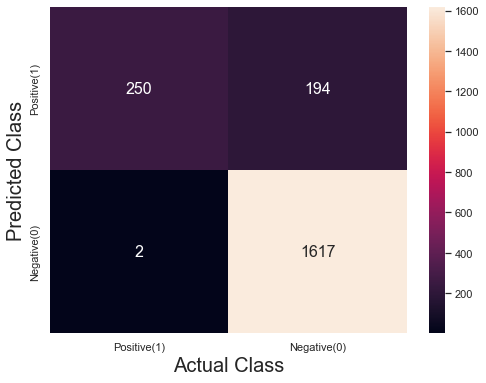

In [121]:
x_axis_labels = ["Positive(1)","Negative(0)"]
y_axis_labels = ["Positive(1)","Negative(0)"]

plt.figure(figsize = (8,6))
sns.set(font_scale=1)
sns.heatmap(cf_test, xticklabels = x_axis_labels, yticklabels = y_axis_labels, annot = True, fmt='g',annot_kws = {'size': 16})
plt.xlabel("Actual Class", fontsize = 20)
plt.ylabel("Predicted Class", fontsize = 20)
plt.show()

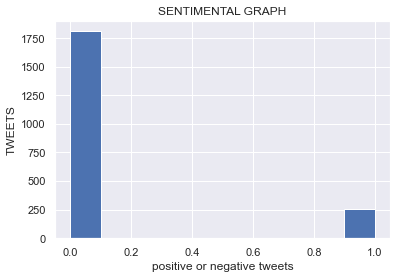

In [122]:
plt.hist(y_pred_mnb)
plt.title("SENTIMENTAL GRAPH")
plt.xlabel("positive or negative tweets")
plt.ylabel("TWEETS")
plt.grid(True)
plt.show()


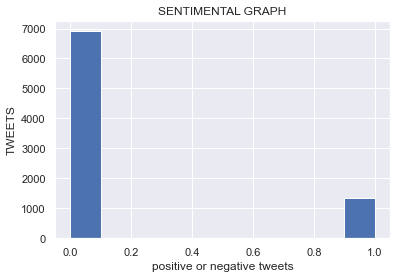

In [123]:
plt.hist(y_pred_mnb_1)
plt.title("SENTIMENTAL GRAPH")
plt.xlabel("positive or negative tweets")
plt.ylabel("TWEETS")
plt.grid(True)
plt.show()
